![img](Images/Epi.png)
<H1>Mon Projet d'Analyse de données<H1>

Dans ce projet d'analyse de données qui est le mien, j'utiliserai le jeu de données des deportés norvegiens 
 lors de la seonde guerre mondiale,  qui ont étés déportés dans le camp d'Auschwits en 1940 à la suite
 de la guerre qu'Hitler a declanché en 1939. lors de cette geurre, beaucoup de camp de concentration ont été
 établi principalement contre les juifs et quelques prisonniers de guerre.
 * j'ai accès à des informations sur une partie des deportés (768 déportés) norvegiens. 
 * Pourquoi certains déporté ont survécu et d'autres sont morts?
 * Commencons l'analyse de données
                     ![img](Images/Deportees.jpg)

## Chargement de données

Les donnés sont dans un tableau au format xlsx(excel):

In [5]:
import pandas as pd
import numpy as np

dep = pd.read_excel('../PB_R-EL/LesDeportes.xlsx')

Ensuite, on OBSERVE ce qu’on a!!

In [6]:
dep.tail(10)

,Nom de Famille,Prénom,Date de Naissance,Arrété à,Comté,Profession,Arrété le,Déporté le,Bateau,Date de décès,Lieu de décès,Numéro de Serie d'Auschwitz,Sexe,survived,DeporteesId,Age
758,Werner,Friedrich,28-Mar-1873,Oslo,Oslo,NaN,1942-10-26 00:00:00,1942-11-26 00:00:00,Donau,1-Dec-1942,Auschwitz,NaN,M,0.0,759,69.0
759,Wilk,Bernhard,5-Oct-1883,Oslo,Oslo,Sales agent,1942-10-26 00:00:00,1942-11-26 00:00:00,Donau,1-Dec-1942,Auschwitz,NaN,M,0.0,760,59.0
760,Wolf,Paul,15-Oct-1885,Oslo,Oslo,Cabinetmaker,1942-11-26 00:00:00,1942-11-26 00:00:00,Donau,1-Dec-1942,Auschwitz,NaN,M,0.0,761,57.0
761,Wolfberg[57][58],Leif (Leiba),1914-10-10 00:00:00,Oslo,Oslo,Violinist,3-Apr-1942,1942-11-26 00:00:00,Monte Rosa,Survived,NaN,81952,F,1.0,762,NaN
762,Wolkoff,Elias,1923-03-06 00:00:00,Oslo,Oslo,Mason,1942-10-27 00:00:00,1942-11-26 00:00:00,Donau,1943-01-19 00:00:00,Auschwitz,79248,M,0.0,763,19.0
763,Wulff,Doris,19-Feb-1938,Oslo,Oslo,Child,1942-11-26 00:00:00,1942-11-26 00:00:00,Donau,1-Dec-1942,Auschwitz,NaN,F,0.0,764,4.0
764,Wulff,Harry,1908-10-24 00:00:00,Oslo,Oslo,Businessman,1942-10-26 00:00:00,1942-11-26 00:00:00,Donau,1943-03-22 00:00:00,Auschwitz,79245,M,0.0,765,34.0
765,Wulff,Olga,17-Apr-1911,Oslo,Oslo,Homemaker,1942-11-26 00:00:00,1942-11-26 00:00:00,Donau,1-Dec-1942,Auschwitz,NaN,M,0.0,766,31.0
766,Zilsel,Martin Heinz,22-Aug-1917,Oslo,Oslo,Photographer,1942-10-26 00:00:00,1942-11-26 00:00:00,Donau,1943-01-14 00:00:00,Auschwitz,NaN,M,0.0,767,25.0
767,Zuckmann,Frida,24-Dec-1888,Trondheim,Sør-Trøndelag,NaN,1942-11-26 00:00:00,24-Feb-1943,Gotenland,1943-03-03 00:00:00,Auschwitz,NaN,F,NaN,768,54.0


In [7]:
dep.shape

(768, 16)

In [8]:
dep.info()
#dep.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nom de Famille               768 non-null    object 
 1   Prénom                       768 non-null    object 
 2   Date de Naissance            767 non-null    object 
 3   Arrété à                     768 non-null    object 
 4   Comté                        768 non-null    object 
 5   Profession                   746 non-null    object 
 6   Arrété le                    765 non-null    object 
 7   Déporté le                   765 non-null    object 
 8   Bateau                       768 non-null    object 
 9   Date de décès                727 non-null    object 
 10  Lieu de décès                738 non-null    object 
 11  Numéro de Serie d'Auschwitz  134 non-null    object 
 12  Sexe                         767 non-null    object 
 13  survived            

Les colonnes sont:

* Nom de Famille : Nom de Famille de la Personne

* Prénom : Prenom de la personne

* Date de Naissance : Date de la Naissance de la Personne

* Arrété à : Lieu ou la Personne a été arrété

* Compté : Le Compté dans lequel il a été arrété

* Profession : La Profession de la Personne

* Arrété le :	Date de son arret	

* Déporté le	: Date de sa deportation	

* Bateau :	Nom du Bateau sur lequel il a été deporté	

* Date de Décès :	True(Survived)/False(0)	

* Age : Age lors de son decès

* Lieu de Décès : Lieu ou il est decédé
* Numéro de Serie d'Auschwitz : Son Numéro de serie à Auschwitz

## Question / Objectif
<strong>Pourquoi certains passagers ont survécu et d’autres sont morts?<strong>

On veut trouver les colonnes qui expliquent le Survived/0 dans Date de Décès et construire un modèle qui permettrait d’expliquer au mieux Date de Décès étant donné nos informations.

On va commencer par observer nos données, en répondant à des questions descriptives:
1. Quel sexe a le plus de chances de survie ?
2. Est-ce que les adolescents ont eu plus de chances de survie ?
3. Calculer la proportion de survie selon le Compté.

### Etape 1: Supprimer les NAN de la colonnes "survived"
La colonne "Survived" a des valeurs manquantes (735 disponibles/768). Comme la plupart des deportés sont morts, on peut supposer que Survived =0.

In [9]:
dep["survived"] = dep["survived"].fillna(0.0)

In [10]:
dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nom de Famille               768 non-null    object 
 1   Prénom                       768 non-null    object 
 2   Date de Naissance            767 non-null    object 
 3   Arrété à                     768 non-null    object 
 4   Comté                        768 non-null    object 
 5   Profession                   746 non-null    object 
 6   Arrété le                    765 non-null    object 
 7   Déporté le                   765 non-null    object 
 8   Bateau                       768 non-null    object 
 9   Date de décès                727 non-null    object 
 10  Lieu de décès                738 non-null    object 
 11  Numéro de Serie d'Auschwitz  134 non-null    object 
 12  Sexe                         767 non-null    object 
 13  survived            

### Quel sexe a le plus de chances de survie ?
* Comparaison de la proportion d’hommes et de femmes passagers du Titanic qui ont survécu

* Utilisons groupby, qui permet de produire des tables de synthèses par catégories:

In [11]:
dep.groupby(['Sexe','survived']).count()['DeporteesId']

Sexe  survived
F     0.0         258
      1.0           6
M     0.0         481
      1.0          22
Name: DeporteesId, dtype: int64

#### Autres tables de synthèse

In [12]:
deportés = dep.groupby('Sexe')['DeporteesId'].count()
deportés

Sexe
F    264
M    503
Name: DeporteesId, dtype: int64

In [13]:
survivors = dep.groupby('Sexe')['survived'].sum()
survivors

Sexe
F     6.0
M    22.0
Name: survived, dtype: float64

In [14]:
summary = pd.DataFrame({"Survivants": survivors,
                        "Deportés": deportés,
                        "%": round(100*survivors / deportés,1)})
summary

,Survivants,Deportés,%
Sexe,,,
F,6.0,264,2.3
M,22.0,503,4.4


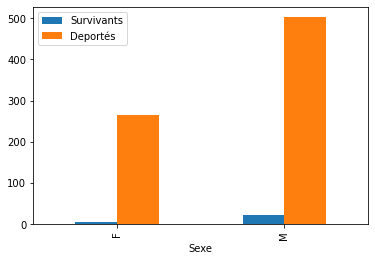

In [15]:
import matplotlib.pyplot as plt
summary[["Survivants", "Deportés"]].plot(kind='bar');

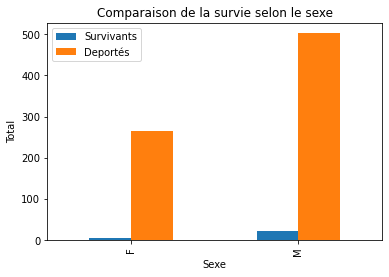

In [16]:
summary[["Survivants", "Deportés"]].plot(kind='bar');
plt.xlabel('Sexe')
plt.ylabel('Total')
plt.title('Comparaison de la survie selon le sexe');

#### Conclution
* Observation :

  * 3,25% seulement des deportés ont survécus dont 4.0% des hommes contre seulement 1,9% des femmes

  * Il y a plus d’hommes que de femmes dans le Camp de Concentration

* Interprétation : Les hommes ont eu plus de chances de survivre que les femmes

Pour aller plus loin, on pourrait regarder à quel age les hommes et femmes avaient la plus grande chance de survie.

### Est-ce que les enfants ont eu plus de chances de survie ?
* On va commencer par séparer les enfants des adultes selon l’age. Problème, on a des données manquantes.

In [17]:
print("Si j'enlève toutes les lignes contenant un 'NaN': ", dep.dropna().shape)
deportes_filtrer_age = dep.loc[dep['Age'].notna(),:]
print("\nSi je n'enlève que les 'NaN' de la colonne Age : ", deportes_filtrer_age.shape)

Si j'enlève toutes les lignes contenant un 'NaN':  (100, 16)

Si je n'enlève que les 'NaN' de la colonne Age :  (738, 16)


Maintenant on va créer une nouvelle colonne indiquant si l’on est adulte

In [18]:
dep['Adult'] = dep['Age'] >=18
dep.tail()

,Nom de Famille,Prénom,Date de Naissance,Arrété à,Comté,Profession,Arrété le,Déporté le,Bateau,Date de décès,Lieu de décès,Numéro de Serie d'Auschwitz,Sexe,survived,DeporteesId,Age,Adult
763,Wulff,Doris,19-Feb-1938,Oslo,Oslo,Child,1942-11-26 00:00:00,1942-11-26 00:00:00,Donau,1-Dec-1942,Auschwitz,NaN,F,0.0,764,4.0,False
764,Wulff,Harry,1908-10-24 00:00:00,Oslo,Oslo,Businessman,1942-10-26 00:00:00,1942-11-26 00:00:00,Donau,1943-03-22 00:00:00,Auschwitz,79245,M,0.0,765,34.0,True
765,Wulff,Olga,17-Apr-1911,Oslo,Oslo,Homemaker,1942-11-26 00:00:00,1942-11-26 00:00:00,Donau,1-Dec-1942,Auschwitz,NaN,M,0.0,766,31.0,True
766,Zilsel,Martin Heinz,22-Aug-1917,Oslo,Oslo,Photographer,1942-10-26 00:00:00,1942-11-26 00:00:00,Donau,1943-01-14 00:00:00,Auschwitz,NaN,M,0.0,767,25.0,True
767,Zuckmann,Frida,24-Dec-1888,Trondheim,Sør-Trøndelag,NaN,1942-11-26 00:00:00,24-Feb-1943,Gotenland,1943-03-03 00:00:00,Auschwitz,NaN,F,0.0,768,54.0,True


In [19]:
pd.set_option('mode.chained_assignment', None)
deportes_filtrer_age['Adult'] = deportes_filtrer_age['Age'] >=18
passengers = deportes_filtrer_age.groupby(['Adult','Sexe']).count()['DeporteesId']
deportés

Sexe
F    264
M    503
Name: DeporteesId, dtype: int64

In [20]:
survivors = deportes_filtrer_age.groupby(['Adult','Sexe'])['survived'].sum()
survivors

Adult  Sexe
False  F       0.0
       M       0.0
True   F       0.0
       M       0.0
Name: survived, dtype: float64

#### Résumons et Visualisons

In [29]:
deportés = deportes_filtrer_age.groupby(['Adult','Sexe'])['DeporteesId'].count()
summary = pd.DataFrame({"Survivants": survivors,
                       "deportes": deportés,
                       "%": round(survivors/deportés*100, 1)})
summary.index=['Girl','Boy','Woman','Man']
summary

,Survivants,deportes,%
Girl,0.0,24,0.0
Boy,0.0,59,0.0
Woman,0.0,234,0.0
Man,0.0,420,0.0


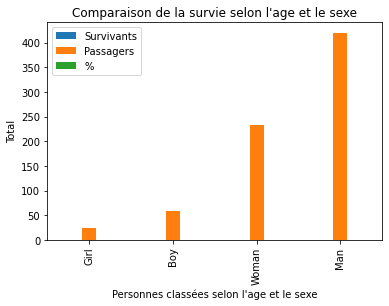

In [22]:
summary.plot(kind='bar')
plt.xlabel("Personnes classées selon l'age et le sexe")
plt.ylabel('Total')
plt.title("Comparaison de la survie selon l'age et le sexe");

* Observations:

 * Il y a plus d’adultes que d’enfants.

 * Ainsi, on a respectivement 52.8%, 28%, 50.3% et 12.2% de survivant-es parmi les filles, garcons, femmes et hommes.

* Interprétation: 
  Quelque soit la catégorie, les personnes de sexe féminin ont une plus grande chance de survie que les masculins. Les enfants de sexe masculin ont une plus grande chance de survie que les adultes mais ce n’est pas réciproque pour les personnes de sexe féminin. Pour aller plus loin, que pourrions nous regarder ?

### Calculer la proportion de survie selon le port d’embarquement

La colonne du comté d’embarquement a des valeurs manquantes. Comme la plupart des deportés sont montées à Oslo, on peut supposer que les données manquantes viennent de là.

In [23]:
dep["Comté"] = dep["Comté"].fillna('Oslo')

In [24]:
survivors_per_comté = dep.groupby('Comté')['survived'].sum()
deportes_per_comté = dep.groupby('Comté')['DeporteesId'].count()
comparaison_comté_survie = pd.DataFrame({"Survivants": survivors_per_comté,
                                        "deportés": deportes_per_comté,
                                        "%": round(survivors_per_comté/deportes_per_comté*100, 1)})
comparaison_comté_survie

,Survivants,deportés,%
Comté,,,
Akershus,0.0,39,0.0
Aust-Agder,2.0,2,100.0
Buskerud,1.0,20,5.0
Finnmark,0.0,2,0.0
Hedmark,0.0,9,0.0
Hordaland,0.0,26,0.0
Møre og Romsdal,3.0,30,10.0
Nordland,0.0,13,0.0
Oppland,0.0,14,0.0


Text(0.5, 1.0, 'Comparaison de survie selon le Comté')

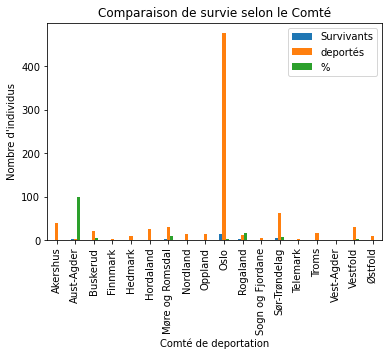

In [25]:
comparaison_comté_survie.plot(kind='bar')
plt.xlabel("Comté de deportation")
plt.ylabel("Nombre d'individus")
plt.title('Comparaison de survie selon le Comté')

La figure indique que:

* la plupart des individus sont capturés à Oslo puis Sør-Trøndelag. après viennent Akershus, Møre og Romsdal, Vestfold, Hordaland, Buskerud, Troms, Oppland, Nordland, Rogaland, Østfold, Hedmark, Sogn og Fjordane, Aust-Agder, Finnmark, Télémark et Vest-Agder.

* le nombre de survivants et survivantes est plus grand selon le meme ordre.

* Respectivement 13/476; 4/62, 3/30 , 2/2 , 1/20 , 1/13 , 1/29  ont survécus selon le comté de déportation d'Oslo, Sør-Trøndelag, Møre og Romsdal, Aust-Agder, Buskerud, Rogaland, Vestfold. Pour les autres, il n'y a aucun survivant.

* L’analyse de proportionnalité nous informe que les individus étant montés à Aust-Agder ont eu plus de chance de survie. Pourquoi cela ?

### C'est quoi la corrélation ? Et la causalité ?
Il existe trois types de relations statistiques:

* corrélation positive: si une variable augmente, l’autre aussi.

* corrélation négative: si une variable augmente, l’autre diminue.

* absence de corrélation: si une variable augmente, l’autre peut ou pas varier sans lien entre elle.

Exemple de corrélation:

![img](Images/correlationChocolatNobels.png)

Cette corrélation est tirée d’un papier de 2012 par F. Messerli.

C. Pissarides, prix Nobel d’économie en 2010 suite à ce papier à commenté:

« To win a Nobel Prize you have to produce something that others haven’t thought about - chocolate that makes you feel good might contribute a little bit. Of course it’s not the main factor but… anything that contributes to a better life and a better outlook in your life then contributes to the quality of your work. »

1. Décrivez la figure

2. Qu’est-ce qu’on observe?

3. Qu’en conclut-on?

Depuis, il a été montré que la corrélation positive est due à la richesse économique (economic wealth).

Alors qu’est ce que la causalité ?

Dans notre exemple, la richesse économique implique

* une plus grande dépense en recherche

* ce qui implique une corrélation positive avec le nombre de prix Nobel.

Par ailleurs et indépendamment, la richesse économique implique :

* de plus grandes dépenses dans les produits de luxe, dont le chocolat.

Causalité n’est pas corrélation
* Les corrélations relèvent de l'observation;

* Les causalités relèvent de l'interprétation !

Retour au Comté de déportation. Pourquoi on survit plus si on est déporté a Aust-Agder ?

Hypothèse : Il y a plus d'hommes parmis les dépotés d'Aust-Agder (?)




#### Hypothèse : Il y a plus d'hommes parmis les dépotés d'Aust-Agder

In [26]:
female_per_comté = dep[dep['Sexe']=='F'].groupby('Comté')['DeporteesId'].count()
male_per_comté = dep[dep['Sexe']=='M'].groupby('Comté')['DeporteesId'].count()
pd.DataFrame({"Female": female_per_comté,
              "Male" : male_per_comté,
              "Total": deportes_per_comté,
              "% Female": female_per_comté / deportes_per_comté
              })

,Female,Male,Total,% Female
Comté,,,,
Akershus,14.0,25,39,0.358974
Aust-Agder,1.0,1,2,0.500000
Buskerud,7.0,13,20,0.350000
Finnmark,NaN,2,2,NaN
Hedmark,3.0,6,9,0.333333
Hordaland,6.0,20,26,0.230769
Møre og Romsdal,8.0,22,30,0.266667
Nordland,2.0,11,13,0.153846
Oppland,4.0,10,14,0.285714


### Corrélation (point mathématique)
Le coefficient de [corrélation linéaire de Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) se calcule facilement en python . Il correspond à la version normalisée par la standard deviation (écart-type) de la covariance. 
Mathematiquement, on a:
$$
\rho_{xy} = \frac{\sigma_{xy}}{\sigma_x\sigma_y}
$$

varie entre -1 et 1 et représente la force de la relation linéaire qui existe entre les 2 vecteurs/séries.

 * 0 : pas de corrélation,
 * 1 : corrélation positive parfaite (si on connait x alors on peut déduire y, les points sont alignés le long d'une droite)
 * -1: corrélation négative parfaite (idem)
 * en réalité, on a souvent des corrélations intermédiaires
« The intention of this contribution was to show that the correlation between chocolate consumption per capita and the number of Nobel laureates per capita (as reported by Messerli, 2012) will vanish if one controls for relevant other variables and if one uses a sophisticated estimation technique. » par Prinz A. L. (2020)
![img](Images/correlationsChocolat.jpeg)
On peut calculer la matrice de corrélation qui correspond à la corrélation entre les colonnes d’une table, et utiliser une carte de chaleur (heatmap en anglais) pour mieux la visualiser:

In [27]:
dep.corr()
dep.corr().style.background_gradient(cmap='coolwarm', axis=1)
#remarque on ne peut pas calculer de correlation linéaire 
#avec des données ayant plus de 2 catégories comme le port d'embarquement
# il faudrait faire une ANOVA (off-topic)

,survived,DeporteesId,Age,Adult
survived,1.000000,0.018018,nan,-0.468322
DeporteesId,0.018018,1.000000,-0.034061,-0.000522
Age,nan,-0.034061,1.000000,0.576315
Adult,-0.468322,-0.000522,0.576315,1.000000


Attention: par défaut, pour attribuer des couleurs aux nombres dans une carte de chaleur, Pandas applique une standardisation par colonne. Le "axis=None" assure que la normalisation est appliquée à l’ensemble des valeurs de la table.

Variante, avec "Seaborn":

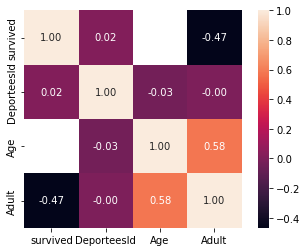

In [28]:
import seaborn as sns

sns.heatmap(dep.corr(), fmt='0.2f', annot=True, square=True);

En conclusion, on peut dire que les déportés ont une très faible chance dans les camp de concentration surtout dans le plus grand et le plus connu de tous. Dans cette perspective, on peut dire que certains d'entre eux on eu plus de chance de survie que les autres. dans les camp comme Auschwitz, il n'y a que les forts qui ont plus de chance de survie à cause des traveaux forcés, ce qui explique la forte survie masculine.